In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
from sklearn.datasets import make_classification

In [144]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [145]:
pd.DataFrame(X)

,0,1
0,2.468563,-2.356941
1,-0.530699,-0.739185
2,0.403720,-0.441711
3,2.569758,0.244477
4,0.656243,-0.642661
...,...,...
995,-2.275093,-0.648956
996,0.974273,1.019649
997,-0.322912,0.160357
998,-0.076934,-0.956207


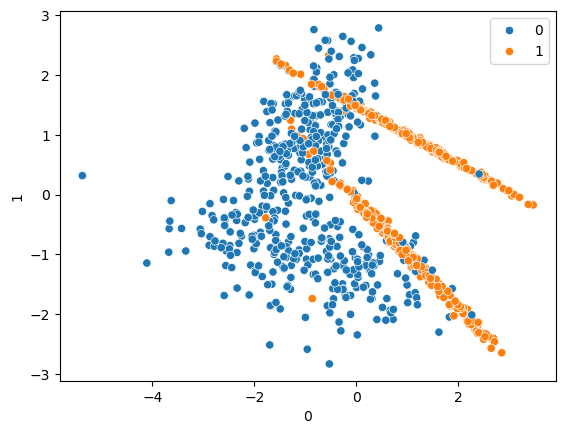

In [146]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [149]:
from sklearn.svm import SVC

In [150]:
svc=SVC(kernel='linear')

In [151]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [152]:
y_pred=svc.predict(X_test)

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
confusion_matrix(y_pred,y_test)

array([[137,  14],
       [ 30, 149]])

In [155]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       151
           1       0.91      0.83      0.87       179

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



## RBF Kernel

In [156]:
rbf=SVC(kernel='rbf')

In [157]:
rbf.fit(X_train,y_train)

SVC()

In [158]:
y_pred=rbf.predict(X_test)

In [159]:
confusion_matrix(y_pred,y_test)

array([[150,  14],
       [ 17, 149]])

In [160]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       164
           1       0.91      0.90      0.91       166

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## Polynomial Kernel

In [161]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred=poly.predict(X_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       180
           1       0.77      0.84      0.81       150

    accuracy                           0.82       330
   macro avg       0.81      0.82      0.81       330
weighted avg       0.82      0.82      0.82       330



## Sigmoid Kernel

In [162]:
sig=SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred=sig.predict(X_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       157
           1       0.79      0.74      0.76       173

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



## Hyperparameter Tuning

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf','sigmoid','poly','linear']
}

In [167]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [168]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.910 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.851 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.851 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.866 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.866 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.851 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.828 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']},
             verbose=3)

In [170]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [172]:
y_pred=grid.predict(X_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       154
           1       0.99      0.91      0.95       176

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

